In [1]:
import nltk
from nltk.corpus import gutenberg as gu
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from matplotlib.colors import ListedColormap
import numpy as np
import numpy.linalg as la
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt

# skeleton 받기 전에 제거한 code

In [2]:
tokenizer = RegexpTokenizer(r'\w+') #문장기호 제거하기
mycor = './'
files = PlaintextCorpusReader(mycor , '.*')
a = files.raw('doyle_fear.txt') #돌레 소설 읽어오기
slw_before = tokenizer.tokenize(a.lower()) #제거된 돌레

In [3]:
tokenizer = RegexpTokenizer(r'\w+') #문장기호 제거하기
mycor = './'
files = PlaintextCorpusReader(mycor , '.*')


In [4]:
slw = [w.lower() for w in files.words('doyle_fear.txt') if w[0].isalpha()]

### 조교가 준 code 와 원래 교제에서 배운 Code 와의 다른점이 있다. 숫자제거가 빠짐


In [5]:
# 문장기호(punctuation) 제거
cbw = [w.lower() for w in gu.words('chesterton-brown.txt') if w[0].isalpha()]

# 많이 쓰인 상위 50개 단어 추출해서 top50 변수에 저장

In [6]:
top50_all = nltk.FreqDist(cbw+slw)
top50 = []
for word, frequency in top50_all.most_common(50):
    top50.append(word)
# (top50,num) = nltk.FreqDist(cbw).most_common(50)

In [7]:
# 각 작가별로 top50에 해당하는 단어가 작품에 몇 개나 나오는지 세서 M에 저장한다
M = []

for corp in [slw, cbw]:
    for i in range(len(corp)//5000):
        words = [w for w in corp[5000*i:5000*(i+1)] if w in top50]
        fdist = nltk.FreqDist(words)
        M.append([fdist[w] for w in top50])

Text(0.5,1,'means')

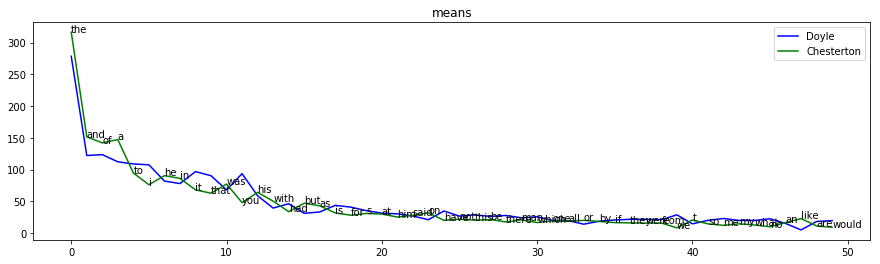

In [17]:
# 단어 평균 빈도 그래프
plt.figure(figsize=(15,4))
plt.plot(np.mean(M[:12],axis=0),'b')
plt.plot(np.mean(M[12:],axis=0),'g')

for i in range(50):
    plt.text(i,np.mean(M[12:],axis=0)[i],top50[i])

plt.legend(['Doyle', 'Chesterton'])
plt.title('means')

In [163]:
# 표준화
M = np.array(M)
M = M - np.mean(M, axis=0)[None, :]  # 컬럼별 mean, 즉 단어별 평균 빈도
M = M / np.std(M, axis=0)  # 단어별 표준 점수화

M = M - np.mean(M, axis=1)[:, None]  # word block 별 평균 표준 점수를 구해서 빼준다(표준화?)

In [164]:
# SVD 수행
U, S, Vt = np.linalg.svd(M,full_matrices=False)

In [166]:
# Diagonal 로 만들기
smat = np.diag(S)

In [167]:
# U, S의 dot product 수행
US = np.dot(U,smat)

In [168]:
# Vt를 transpose 해서 S와 dot product 수행
Vttras = np.transpose(Vt)
# Vttras[:2]

In [169]:
VS = np.dot(Vttras,smat)

Text(0.5,1,'Sherlock words                       Father Brown words')

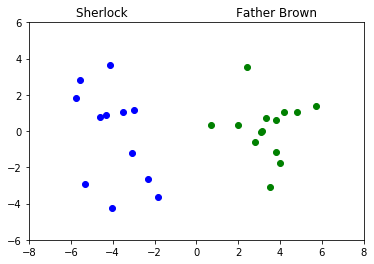

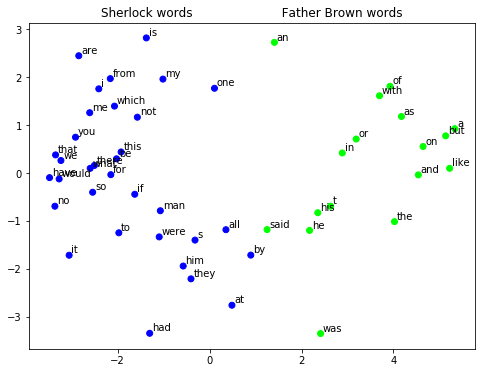

In [170]:
# 문서 분포 그래프
plt.plot(US[:12, 0], US[:12, 1], 'ob')
plt.plot(US[12:, 0], US[12:, 1], 'og')
plt.xlim(-8, 8)
plt.ylim(-6, 6)

plt.title('Sherlock                            Father Brown')

# 단어 분포 그래프
cmap_light = ListedColormap(['#0000FF', '#00FF00'])

plt.figure(figsize=(8, 6))
plt.scatter(VS[:, 0], VS[:, 1], c=VS[:, 0], cmap=cmap_light)
for k in range(len(top50)):
    plt.text(VS[k][0] + .05, VS[k][1] + .05, top50[k])
plt.title('Sherlock words                       Father Brown words')


# ------------------------
#
## REMOVE STOPWORDS

#
# ------------------------

In [171]:
# 영어 stopword 가져오기
stop = set(stopwords.words('english')) 

In [172]:
# 문장기호 제거
# slw_clean = [w.lower() for w in slw.words('Sherlock.txt') if (w[0].isalpha()) and (w.lower() not in stop)]
cbw_clean = [w.lower() for w in gu.words('chesterton-brown.txt') if w[0].isalpha() and w.lower() not in stop]

# Skeleton 받기 전에 제거한 방법

In [173]:
slw_clean = []
for w in slw:
    if w not in stop_words:
        slw_clean.append(w)

# 많이 쓰인 상위 50개 단어 추출해서 top50_clean 변수에 저장

In [174]:
top50_clean_all = nltk.FreqDist(slw_clean+cbw_clean)
top50_clean = []
for word, frequency in top50_clean_all.most_common(50):
    top50_clean.append(word)

In [175]:
# 각 작가별로 top50에 해당하는 단어가 작품에 몇 개나 나오는지 세서 M에 저장한다
M_clean = []

for corp in [slw_clean, cbw_clean]:
    for i in range(len(corp)//5000):
        words = [w for w in corp[5000*i:5000*(i+1)] if w in top50_clean]
        fdist = nltk.FreqDist(words)
        M_clean.append([fdist[w] for w in top50_clean])

Text(0.5,1,'means')

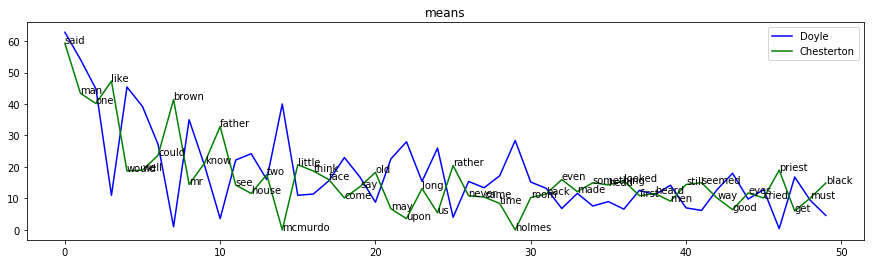

In [176]:
# 단어 평균 빈도 그래프
plt.figure(figsize=(15, 4))
plt.plot(np.mean(M_clean[:5], axis=0), 'b')
plt.plot(np.mean(M_clean[5:], axis=0), 'g')

for i in range(50):
    plt.text(i, np.mean(M_clean[5:], axis=0)[i], top50_clean[i])

plt.legend(['Doyle', 'Chesterton'])
plt.title('means')

In [177]:

# 표준화
M_clean = np.array(M_clean)
M_clean = M_clean - np.mean(M_clean, axis=0)[None, :]  # 컬럼별 mean, 즉 단어별 평균 빈도
M_clean = M_clean / np.std(M_clean, axis=0)  # 단어별 표준 점수화

M_clean = M_clean - np.mean(M_clean, axis=1)[:, None]  # word block 별 평균 표준 점수를 구해서 빼준다(표준화?)

In [178]:
# SVD 수행
U_c, S_c, Vt_c = np.linalg.svd(M_clean,full_matrices=False)

In [179]:
smat_c = np.diag(S_c)

In [180]:
# U, S의 dot product 수행
US_c = np.dot(U_c,smat_c)

In [181]:
# Vt를 transpose 해서 S와 dot product 수행
Vttras_c = np.transpose(Vt_c)
# Vttras[:2]

In [182]:
VS_c = np.dot(Vttras_c,smat_c)

Text(0.5,1,'Sherlock words                       Father Brown words')

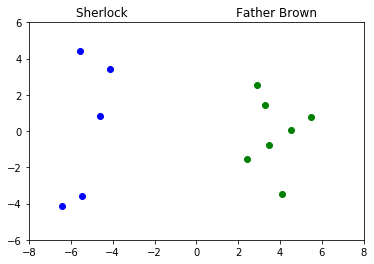

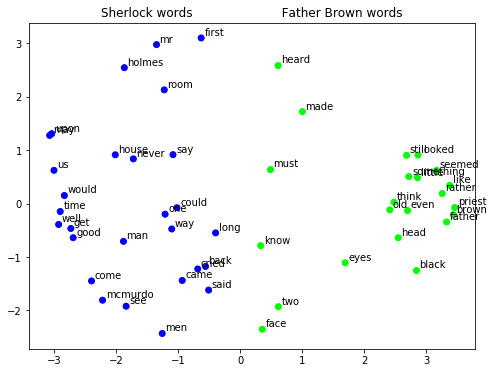

In [183]:
# 문서 분포 그래프
plt.plot(US_c[:5, 0], US_c[:5, 1], 'ob')
plt.plot(US_c[5:, 0], US_c[5:, 1], 'og')
plt.xlim(-8, 8)
plt.ylim(-6, 6)

plt.title('Sherlock                            Father Brown')

# 단어 분포 그래프
cmap_light = ListedColormap(['#0000FF', '#00FF00'])

plt.figure(figsize=(8, 6))
plt.scatter(VS_c[:, 0], VS_c[:, 1], c=VS_c[:, 0], cmap=cmap_light)
for k in range(len(top50_clean)):
    plt.text(VS_c[k][0] + .05, VS_c[k][1] + .05, top50_clean[k])
plt.title('Sherlock words                       Father Brown words')
